# Alunos
Thiago Pereira Freire - 202110167

Daniel Messias Santos - 202110168

# Enunciado

Uma empresa transporta óleo de uma estação A para uma estação B. Existem duas rotas disponíveis: a rota norte e a rota sul, ambas passando por estações intermediárias. Além disso, há uma ligação direta entre a estação intermediária sul e a estação intermediária norte. A Figura 1 abaixo ilustra essa situação, incluindo as capacidades das ligações em barris por dia.

Formule um programa linear utilizando a biblioteca GurobiPy para maximizar o número de barris por dia transportados de A para B. Em seguida, realize uma análise de sensibilidade e discuta os resultados obtidos.

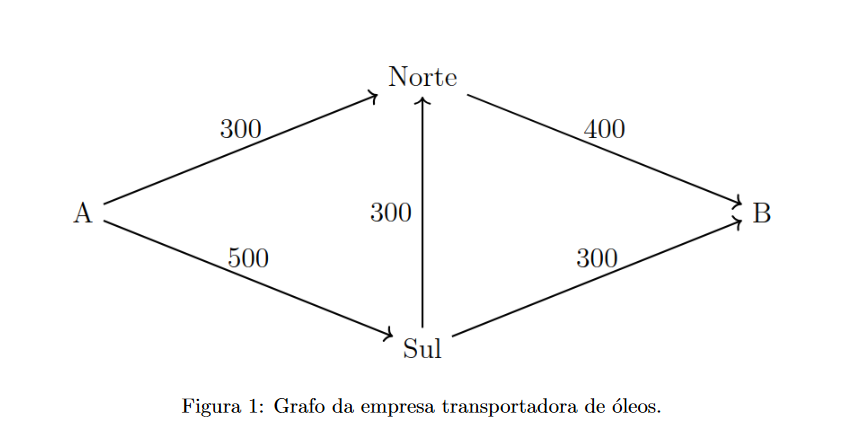

# Modelagem

## Função objetivo
\begin{equation}
  max f(X, Y, Z) = X + Y + Z
\end{equation}

## Restrições
\begin{equation}
X \le 300
\end{equation}

\begin{equation}
Y \le 500
\end{equation}

\begin{equation}
Z \le 300
\end{equation}

\begin{equation}
X + Z \le 400
\end{equation}

\begin{equation}
Y - Z \le 300
\end{equation}

\begin{equation}
X, Y, Z \ge 0
\end{equation}

## Variáveis
X: Quantidade transportada de A para Norte

Y: Quantidade transportada de A para Sul

Z: Quantidade transportada de Sul para Norte

In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 17.1 MB/s eta 0:00:00


In [ ]:
from gurobipy import Model, GRB

# Criar o modelo
modelo = Model("oleo")

Restricted license - for non-production use only - expires 2026-11-23


In [ ]:
rota_norte_var = modelo.addVar(name="norte", vtype=GRB.CONTINUOUS, lb=0)
rota_sul_var = modelo.addVar(name="sul", vtype=GRB.CONTINUOUS, lb=0)
rota_intermediaria_var = modelo.addVar(name="intermediaria", vtype=GRB.CONTINUOUS, lb=0)

In [ ]:
modelo.setObjective(rota_norte_var + rota_sul_var + rota_intermediaria_var, GRB.MAXIMIZE)

In [ ]:
modelo.addConstr(rota_norte_var <= 300, "limite_norte")
modelo.addConstr(rota_sul_var <= 500, "limite_sul")
modelo.addConstr(rota_intermediaria_var <= 300, "limite_intermediaria")
modelo.addConstr(rota_norte_var + rota_intermediaria_var <= 400, "limite_norte_intermediaria")
modelo.addConstr(rota_sul_var - rota_intermediaria_var <= 300, "limite_sul_intermediaria")

<gurobi.Constr *Awaiting Model Update*>

In [ ]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 5 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x2606207d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 5e+02]
Presolve removed 3 rows and 0 columns
Presolve time: 0.03s
Presolved: 2 rows, 3 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0000000e+02   3.750000e+01   0.000000e+00      0s
       1    9.0000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.04 seconds (0.00 work units)
Optimal objective  9.000000000e+02


In [ ]:
if(modelo.status == GRB.OPTIMAL):
  print("O valor ótimo é: ", modelo.objVal)
  print("Rota Norte: ", rota_norte_var.x)
  print("Rota Sul: ", rota_sul_var.x)
  print("Rota Intermediária: ", rota_intermediaria_var.x)

O valor ótimo é:  900.0
Rota Norte:  200.0
Rota Sul:  500.0
Rota Intermediária:  200.0


In [ ]:
print("\nIntervalos de Custos (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  lower bound do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  upper bound do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  lower bound do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  upper bound do recurso (SARHSUp): {restricao.SARHSUp}")


Intervalos de Custos (Vetor de Custos):
Variável norte:
  lower bound do custo (SAObjLow): 1.0
  upper bound do custo (SAObjUp): 2.0
Variável sul:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): inf
Variável intermediaria:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): 1.0

Intervalos de Recursos (Vetor de Recursos):
Restrição limite_norte:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): inf
Restrição limite_sul:
  lower bound do recurso (SARHSLow): 400.0
  upper bound do recurso (SARHSUp): 600.0
Restrição limite_intermediaria:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): inf
Restrição limite_norte_intermediaria:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): 500.0
Restrição limite_sul_intermediaria:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): 400.0


# 2. Análise de Sensibilidade
Através da análise de sensibilidade do problema dos barris de óleo, pode-se observar que o vetor de custos se encontra em uma situação que não aceita modificação sem que a solução ótima se modifique.
Além disso, é possível observar que o caminho sul limita a quantidade de barris que podem ser transportados, isso por que os caminhos norte e intermediário possuem limite superior infinito, o que indica que essas variáveis podem ser aumentadas indefinidamente sem que o resultado final seja alterado.